# Load Train Model From Checkpoint

In [1]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [40]:
# Load pipeline config and build a detection model
MODEL_DIR = r'C:\Users\pui_s\Downloads\bird_box\trained_ssd_mobnet'
configs = config_util.get_configs_from_pipeline_file(MODEL_DIR + r'\pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(MODEL_DIR, r'checkpoint', 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from an Image

In [21]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

In [5]:
# category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
category_index = label_map_util.create_category_index_from_labelmap(r'C:\Users\pui_s\Downloads\bird_box\asset\label_map.pbtxt')

In [34]:
from glob import glob
images = glob(r'C:\Users\pui_s\Downloads\bird_pics_free\*')

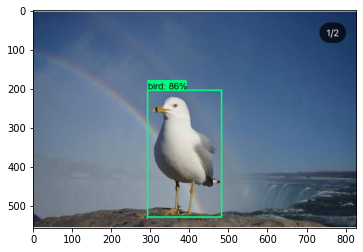

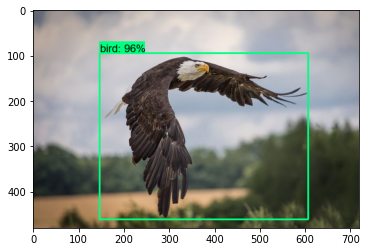

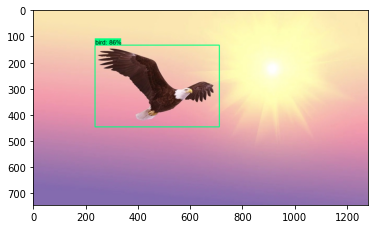

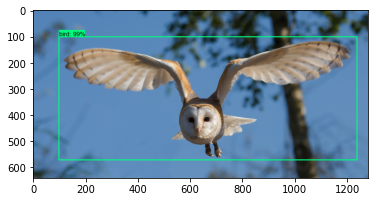

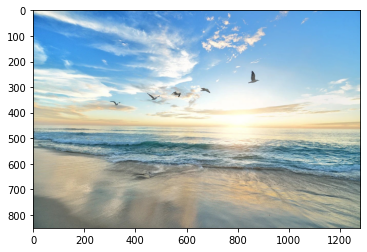

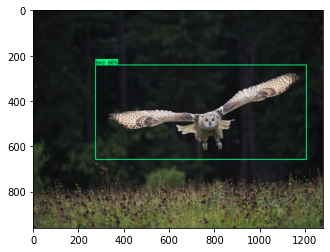

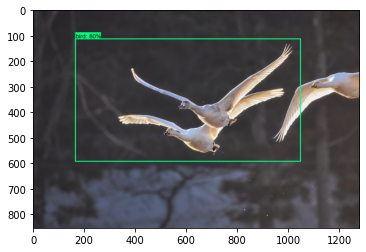

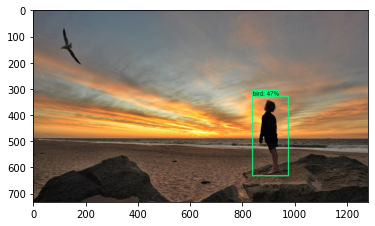

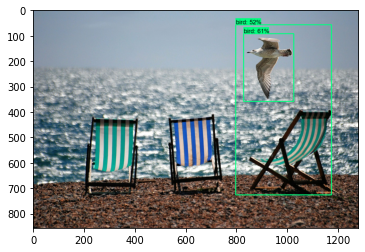

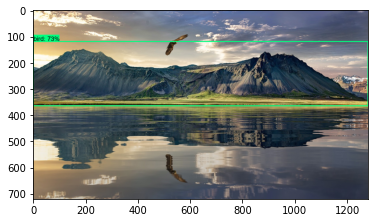

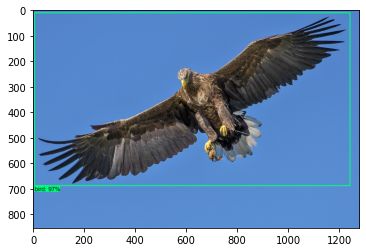

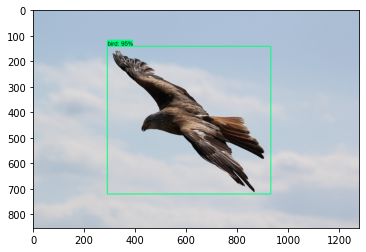

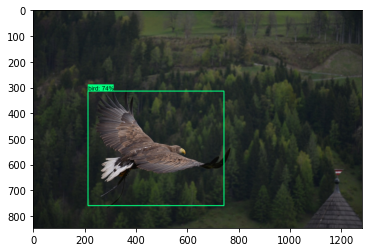

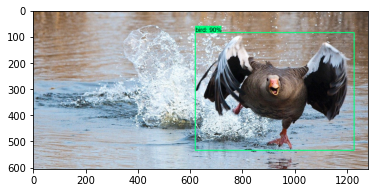

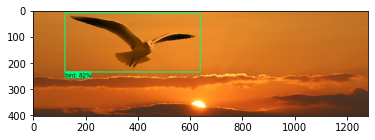

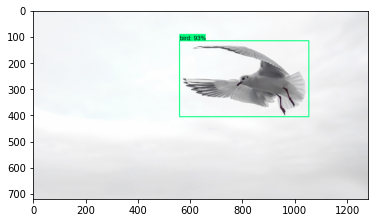

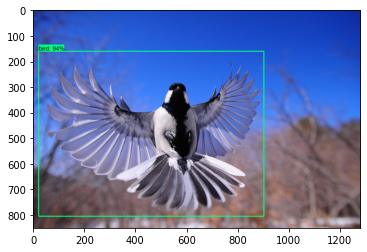

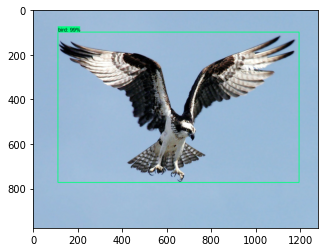

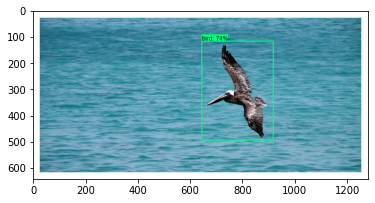

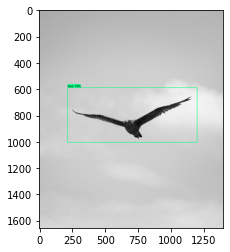

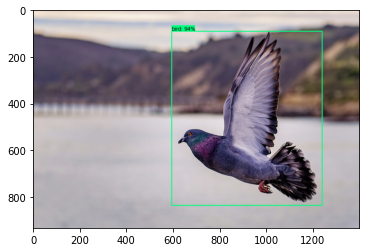

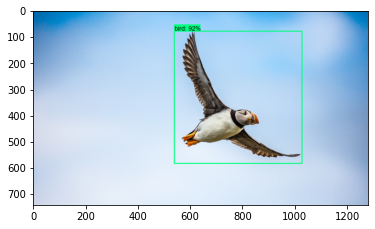

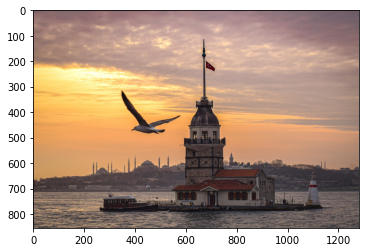

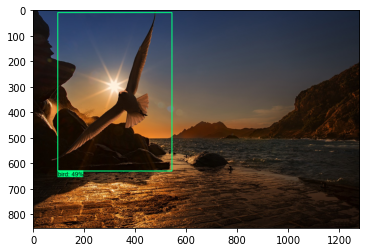

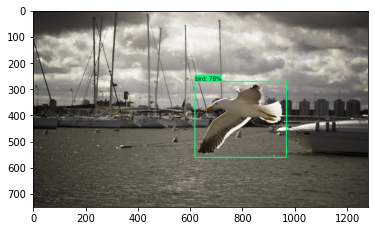

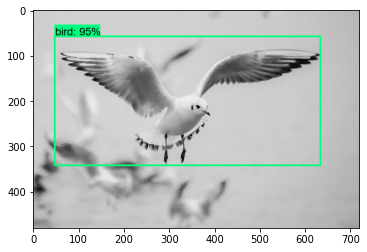

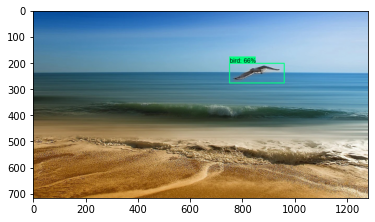

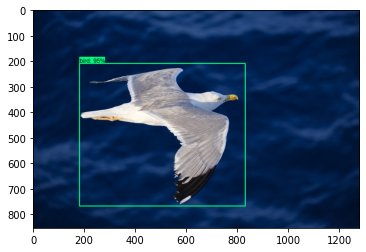

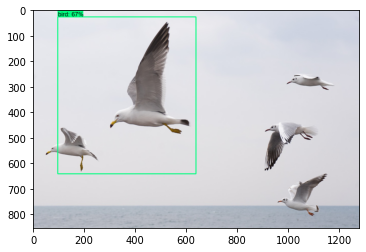

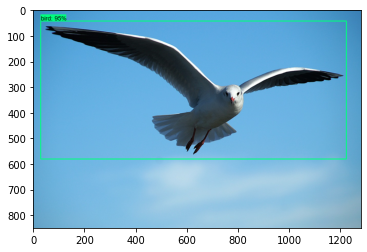

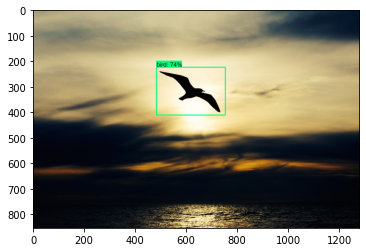

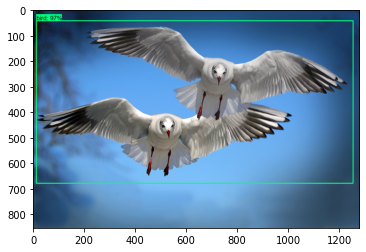

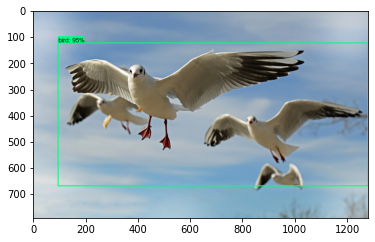

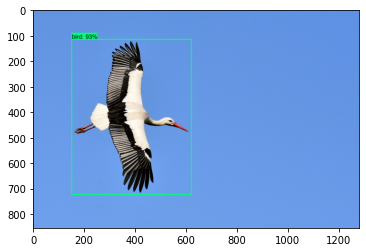

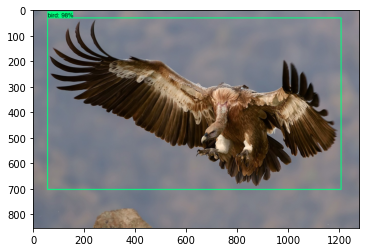

Total Time: 139.650361 seconds


In [41]:
t0 = datetime.now()
for IMAGE_PATH in images:
    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.4,
                agnostic_mode=False)

    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()
print(f'Total Time: {(datetime.now()-t0).total_seconds()} seconds')